In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [1]:
!pip install pennylane
from IPython.display import clear_output
clear_output()

In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

# Loading Raw Data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [7]:
num_sample = 200
n_class = 4
mult_test = 0.25

X_train = x_train_list[0][:num_sample, :]
X_test = x_test_list[0][:int(mult_test*num_sample), :]

Y_train = np.zeros((n_class*X_train.shape[0],), dtype=int)
Y_test = np.zeros((n_class*X_test.shape[0],), dtype=int)

for i in range(n_class-1):
  X_train = np.concatenate((X_train, x_train_list[i+1][:num_sample, :]), axis=0)
  Y_train[num_sample*(i+1):num_sample*(i+2)] = int(i+1)

  X_test = np.concatenate((X_test, x_test_list[i+1][:int(mult_test*num_sample), :]), axis=0)
  Y_test[int(mult_test*num_sample*(i+1)):int(mult_test*num_sample*(i+2))] = int(i+1)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 784) (800,)
(200, 784) (200,)


# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [8]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [9]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((800, 784), (800,))

In [10]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_test.shape

((200, 784), (200,))

## PCA

In [11]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [12]:
num_component = 18
pca = PCA(n_components=num_component, svd_solver='full')

In [13]:
pca.fit(X_train)

PCA(n_components=18, svd_solver='full')

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11187049, 0.17426217, 0.22255275, 0.26823812, 0.29848662,
       0.32845008, 0.35463849, 0.37642907, 0.39726625, 0.41665801,
       0.43362531, 0.45000593, 0.46514029, 0.47967233, 0.49309012,
       0.50584068, 0.51819716, 0.53015231])

In [15]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [16]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(800, 18) (800,)
(200, 18) (200,)


## Norm

In [17]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

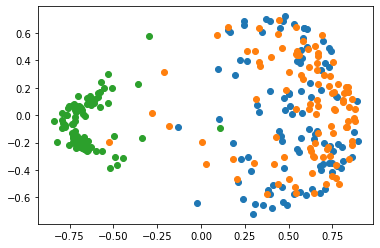

In [18]:
plt.scatter(X_train[:100, 0], X_train[:100, 1])
plt.scatter(X_train[100:200, 0], X_train[100:200, 1])
plt.scatter(X_train[200:300, 0], X_train[200:300, 1])

# Quantum

In [19]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import AdamOptimizer, GradientDescentOptimizer

qml.enable_tape()


# Set a random seed
np.random.seed(42)

In [20]:
# Define output labels as quantum state vectors

# def density_matrix(state):
#     """Calculates the density matrix representation of a state.

#     Args:
#         state (array[complex]): array representing a quantum state vector

#     Returns:
#         dm: (array[complex]): array representing the density matrix
#     """
#     return state * np.conj(state).T


label_0 = [[1], [0]]
label_1 = [[0], [1]]


def density_matrix(state):
    """Calculates the density matrix representation of a state.

    Args:
        state (array[complex]): array representing a quantum state vector

    Returns:
        dm: (array[complex]): array representing the density matrix
    """
    return np.outer(state,  np.conj(state))

#state_labels = [label_0, label_1]
state_labels = np.loadtxt('./tetra_states.txt', dtype=np.complex_)

In [21]:
dm_labels = [density_matrix(state_labels[i]) for i in range(4)]
len(dm_labels)

4

In [22]:
n_qubits = 4  # number of class
dev_fc = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_fc)
def q_fc(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return [qml.expval(qml.Hermitian(dm_labels[i], wires=[i])) for i in range(n_qubits)]


In [23]:
X_train[0].shape

(18,)

In [24]:
a = np.random.uniform(size=(2, 1, 18))

q_fc(a, X_train[0])

tensor([0.89712628, 0.0944862 , 0.57885108, 0.42953645], requires_grad=True)

In [25]:
tetra_class = np.loadtxt('./tetra_class_label.txt')
binary_class = np.array([[1, 0], [0, 1]])

In [26]:
class_labels = tetra_class

In [27]:
n_class = 4

temp = np.zeros((len(Y_train), n_class))
for i in range(len(Y_train)):
    temp[i, :] = class_labels[Y_train[i]]
Y_train = temp


temp = np.zeros((len(Y_test), n_class))
for i in range(len(Y_test)):
    temp[i, :] = class_labels[Y_test[i]]
Y_test = temp

In [28]:
Y_train.shape, Y_test.shape

((800, 4), (200, 4))

In [29]:
from keras import backend as K


# Alpha Custom Layer
class class_weights(tf.keras.layers.Layer):
    def __init__(self):
        super(class_weights, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(1, 4), dtype="float32"),
            trainable=True,
        )

    def call(self, inputs):
        return (inputs * self.w)

In [60]:
n_component = 18

X = tf.keras.Input(shape=(n_component,), name='Input_Layer')


# Quantum FC Layer, trainable params = 18*L*n_class + 2, output size = 2
num_fc_layer = 5
q_fc_layer_0 = qml.qnn.KerasLayer(q_fc, {"params": (2, num_fc_layer, n_component)}, output_dim=4)(X)

# Alpha Layer
alpha_layer_0 = class_weights()(q_fc_layer_0)

model = tf.keras.Model(inputs=X, outputs=alpha_layer_0)

In [61]:
model(X_train[0:32])

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[-0.03269799, -0.0049948 , -0.00317884, -0.02083719],
       [-0.03096591, -0.00404948, -0.00372119, -0.02107909],
       [-0.0313696 , -0.00514707, -0.00323279, -0.02125254],
       [-0.03068135, -0.00461393, -0.00351107, -0.02131253],
       [-0.03544348, -0.00245122, -0.00416135, -0.01899268],
       [-0.03995319, -0.00168156, -0.00479718, -0.01586739],
       [-0.03295194, -0.004956  , -0.00317453, -0.02075064],
       [-0.04368913, -0.00336435, -0.0042463 , -0.01416344],
       [-0.03615635, -0.0031164 , -0.00379086, -0.0190424 ],
       [-0.03387051, -0.0055308 , -0.00289721, -0.02054788],
       [-0.0333972 , -0.00527587, -0.00302153, -0.02066674],
       [-0.04260389, -0.002764  , -0.0044099 , -0.01472712],
       [-0.03461572, -0.0041047 , -0.00340947, -0.01998828],
       [-0.04149674, -0.00194359, -0.00488151, -0.01474264],
       [-0.03888194, -0.00246304, -0.00414337, -0.0173567 ],
       [-0.03758543, -0.00368908, -0

In [32]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(opt, loss='mse', metrics=["accuracy"])

In [36]:
H = model.fit(X_train, Y_train, epochs=11, batch_size=32, initial_epoch=10,
              validation_data=(X_test, Y_test), verbose=1)

Epoch 11/11
25/25 [==============================] - 7866s 315s/step - loss: 0.0264 - accuracy: 0.9388 - val_loss: 0.0324 - val_accuracy: 0.9000


In [45]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 18)]              0         
_________________________________________________________________
keras_layer (KerasLayer)     (None, 4)                 180       
_________________________________________________________________
class_weights (class_weights (None, 4)                 4         
Total params: 184
Trainable params: 184
Non-trainable params: 0
_________________________________________________________________


In [63]:
QFC_weights = np.array([[[-0.24794507,  0.31784198, -0.84436625, -1.1883082 ,
          -0.7634019 ,  0.5219758 ,  0.1976731 , -0.06499895,
          -0.0908122 , -0.21367463,  0.36914957,  0.8344203 ,
          -0.8683266 , -1.3748152 , -1.2707427 ,  0.72362924,
          -0.5218088 , -1.141733  ],
         [ 0.28023252, -1.4568554 ,  1.1919973 ,  0.95526534,
           0.6763064 , -1.2501957 , -0.25392818, -0.51355195,
          -0.5743778 ,  0.03443891, -0.32394207, -0.50722027,
          -0.1010123 ,  1.6800913 , -0.20726536,  0.09410696,
           0.35715213,  0.93558955],
         [ 1.3068962 ,  1.0741785 , -0.26494667, -0.87930703,
          -1.6576172 , -0.05226917,  0.60002285, -0.03117862,
          -0.6541664 ,  0.5198687 , -0.5183295 , -0.23373857,
           0.21046656,  0.83765674, -0.8159693 ,  0.27976495,
           0.3204563 ,  0.1849181 ],
         [-1.5540495 , -0.8279865 ,  1.5622419 , -0.41232887,
           0.5265447 , -0.8407992 , -0.2505865 , -1.5310311 ,
          -0.5762857 ,  0.26670507,  0.30925843,  0.19047949,
           1.4921657 ,  0.03055724, -0.88385344,  0.22408725,
           0.29685184, -0.2952265 ],
         [ 0.15627815, -0.54752415, -0.04468342, -1.3522485 ,
          -0.48985276,  0.10767151,  1.2368381 , -0.5070927 ,
          -1.4977047 ,  0.50521874,  0.5171645 ,  0.5567452 ,
          -0.5166422 , -0.00310687, -0.37942237,  0.81982815,
          -0.74149036,  0.6565688 ]],
 
        [[-0.2609948 , -0.38150507, -0.65071046, -0.13585699,
          -0.357049  , -0.50965524, -0.56098264, -1.2089188 ,
          -0.27748486,  0.20019874, -1.2297689 ,  0.1892851 ,
           0.33155286, -0.84930825,  0.42624596,  0.8912256 ,
          -0.4064474 ,  0.9417156 ],
         [ 0.5626757 , -0.10127709,  0.14564358,  0.3688126 ,
          -0.16021737,  0.46522865,  0.5524775 , -0.30932057,
           0.51160085,  0.5409226 , -0.29887158,  0.25838193,
           0.21177538, -0.46760964,  0.512804  ,  0.36143306,
          -0.4297975 ,  0.1940067 ],
         [ 0.5272889 , -0.25206625,  0.03391184,  0.5019607 ,
          -0.33839497, -0.04660035,  0.38688624, -0.29353273,
           0.22680895,  0.2027986 , -0.01748817,  0.2132353 ,
           0.07397417, -0.527892  ,  0.21246526,  0.5088591 ,
          -0.49574885,  0.32320118],
         [ 0.36846712, -1.3814771 ,  0.02950246,  0.04169217,
          -0.19097951,  0.49078554,  0.22259521, -0.48360834,
           0.44732705,  0.24283813, -0.30897924,  0.8293856 ,
           0.57208365, -0.2657901 ,  0.22882256,  0.5956244 ,
          -0.25040096,  0.60783666],
         [ 0.11506801, -0.85853696,  0.13871562,  0.26290226,
           0.1396487 ,  0.41412732,  0.55495775, -0.17918082,
           0.1956458 ,  0.20722097, -0.4376773 ,  0.20676897,
           0.14666991, -0.11038188,  0.5372865 ,  0.6356519 ,
          -0.2815731 ,  0.05654705]]])

alpha_weights = np.array([[0.95540386, 0.9578444 , 0.9244269 , 0.9786792 ]])


random_weights = np.array([[[-0.36112985,  0.2111288 ,  0.1098108 ,  0.2544383 ,
          -0.00469187,  0.23564419,  0.09462297, -0.10537443,
          -0.1827577 ,  0.1888242 , -0.01841468, -0.3521782 ,
           0.01429042,  0.16698363, -0.1126308 ,  0.04128608,
           0.21461311,  0.21338132],
         [ 0.3593494 ,  0.08668402,  0.15885702, -0.02335867,
          -0.04869598,  0.275398  , -0.3137846 ,  0.08977276,
           0.2253721 , -0.18542384, -0.3333074 ,  0.31376943,
           0.12819389,  0.06190303,  0.17703393,  0.27163342,
          -0.25187245, -0.26603517],
         [ 0.16647735,  0.03004244, -0.3283678 ,  0.04993302,
          -0.32206902,  0.02703008,  0.05270675, -0.09857991,
           0.00324991, -0.28245538, -0.10020354,  0.29717395,
           0.15914598, -0.15878536, -0.25371322,  0.03080389,
          -0.06773141, -0.11743486],
         [ 0.12210909,  0.07943538, -0.10011089, -0.04656166,
          -0.119377  ,  0.33514777, -0.16245961, -0.32084054,
           0.20315215, -0.05815163,  0.31756565,  0.24835989,
          -0.3042428 ,  0.1538715 ,  0.25559852,  0.29601124,
           0.00596908, -0.12077881],
         [-0.24536519,  0.1744332 , -0.03993386, -0.3454345 ,
           0.03591821, -0.0457353 ,  0.19012448,  0.02417549,
          -0.20383422,  0.20029023,  0.1462051 ,  0.00287226,
          -0.20076373, -0.09745416,  0.05462858, -0.1822384 ,
          -0.28180847, -0.08870667]],
 
        [[ 0.28420517,  0.18587604,  0.00432023,  0.25276604,
           0.05588883, -0.00873002, -0.27388182,  0.3434634 ,
          -0.06190786,  0.25342664, -0.19336648,  0.05619821,
           0.07311618, -0.27361515, -0.31822798,  0.2828535 ,
          -0.12242647,  0.04382321],
         [-0.12123071,  0.32336965, -0.1337805 ,  0.288658  ,
           0.07935324, -0.03748059,  0.13666189, -0.26198447,
           0.35916874,  0.2469289 , -0.27585262,  0.07430342,
           0.18836996, -0.20980959,  0.21768215, -0.22659385,
           0.1150386 , -0.03592232],
         [ 0.25624803,  0.05419984, -0.22457275, -0.03983879,
          -0.01237604, -0.06241676,  0.03393343,  0.04649976,
           0.17708406, -0.33100724,  0.11731407, -0.15705237,
          -0.24502842,  0.13760579,  0.12690815,  0.18652782,
           0.24556735, -0.31121215],
         [-0.33468038, -0.32810587, -0.1602223 ,  0.0639796 ,
          -0.3495075 ,  0.1994125 ,  0.30946454, -0.34355676,
           0.1294198 , -0.071861  , -0.00135946,  0.35577133,
          -0.1217315 , -0.19366252,  0.33390567, -0.29659882,
          -0.13090186, -0.20641613],
         [ 0.05562809,  0.06060928,  0.17894706,  0.2511054 ,
           0.25008014,  0.33573475, -0.25808984,  0.0137409 ,
           0.19059703, -0.00527525, -0.12321451, -0.16738267,
           0.07972926, -0.24245685, -0.07204226,  0.35075697,
          -0.05655339, -0.26262018]]])

QFC_weights.shape, alpha_weights.shape, random_weights.shape

((2, 5, 18), (1, 4), (2, 5, 18))

# Exploring the results

In [68]:
# sanity check

pred = []
random_pred = []
for i in range(len(X_test)):
    pred += [np.argmax(q_fc(QFC_weights, X_test[i]).numpy())]
    random_pred += [np.argmax(q_fc(random_weights, X_test[i]).numpy())]

In [93]:
n_qubits = 1
dev_state = qml.device("default.qubit", wires=n_qubits)


@qml.qnode(dev_state)
def q_fc_state(params, inputs):
    """A variational quantum circuit representing the DRC.

    Args:
        params (array[float]): array of parameters
        inputs = [x, y]
        x (array[float]): 1-d input vector
        y (array[float]): single output state density matrix

    Returns:
        float: fidelity between output state and input
    """
    
    # layer iteration
    for l in range(len(params[0])):
        # qubit iteration
        for q in range(n_qubits):
            # gate iteration
            for g in range(int(len(inputs)/3)):
                qml.Rot(*(params[0][l][3*g:3*(g+1)] * inputs[3*g:3*(g+1)] + params[1][l][3*g:3*(g+1)]), wires=q)
    
    return qml.expval(qml.Hermitian(dm_labels[0], wires=[0]))


In [98]:
q_fc_state(QFC_weights, X_test[0])

tensor(0.99983508, requires_grad=True)

In [99]:
dev_state._state

array([-0.01164988-0.00540416j,  0.71750379-0.69643621j])

In [96]:
train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(QFC_weights, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(QFC_weights, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp

In [125]:
np.conj(train_state[150]) @ dm_labels[0] @ train_state[150]

tensor(0.6960952+0.j, requires_grad=True)

In [126]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [128]:
np.conj(test_state[0]) @ dm_labels[0] @ test_state[0]

tensor(0.99983508+0.j, requires_grad=True)

In [129]:
np.savetxt('./4_PCA_QFC-State_Train.txt', train_state)
np.savetxt('./4_PCA_QFC-State_Test.txt', test_state)

In [130]:
train_state = np.zeros((len(X_train), 2), dtype=np.complex_)
test_state = np.zeros((len(X_test), 2), dtype=np.complex_)

for i in range(len(train_state)):
    
    q_fc_state(random_weights, X_train[i])
    temp = np.flip(dev_state._state)
    train_state[i, :] = temp

for i in range(len(test_state)):
    
    q_fc_state(random_weights, X_test[i])
    temp = np.flip(dev_state._state)
    test_state[i, :] = temp

In [132]:
np.conj(train_state[0]) @ dm_labels[0] @ train_state[0]

tensor(0.66848859+0.j, requires_grad=True)

In [133]:
train_state[0] @ np.conj(train_state[0])

tensor(1.+0.j, requires_grad=True)

In [134]:
np.savetxt('./4_PCA_QFC-RandomState_Train.txt', train_state)
np.savetxt('./4_PCA_QFC-RandomState_Test.txt', test_state)

In [35]:
# 5 layer, 18 components, 10 epochs
model.weights

[<tf.Variable 'model/keras_layer/params:0' shape=(2, 5, 18) dtype=float32, numpy=
 array([[[-0.24794507,  0.31784198, -0.84436625, -1.1883082 ,
          -0.7634019 ,  0.5219758 ,  0.1976731 , -0.06499895,
          -0.0908122 , -0.21367463,  0.36914957,  0.8344203 ,
          -0.8683266 , -1.3748152 , -1.2707427 ,  0.72362924,
          -0.5218088 , -1.141733  ],
         [ 0.28023252, -1.4568554 ,  1.1919973 ,  0.95526534,
           0.6763064 , -1.2501957 , -0.25392818, -0.51355195,
          -0.5743778 ,  0.03443891, -0.32394207, -0.50722027,
          -0.1010123 ,  1.6800913 , -0.20726536,  0.09410696,
           0.35715213,  0.93558955],
         [ 1.3068962 ,  1.0741785 , -0.26494667, -0.87930703,
          -1.6576172 , -0.05226917,  0.60002285, -0.03117862,
          -0.6541664 ,  0.5198687 , -0.5183295 , -0.23373857,
           0.21046656,  0.83765674, -0.8159693 ,  0.27976495,
           0.3204563 ,  0.1849181 ],
         [-1.5540495 , -0.8279865 ,  1.5622419 , -0.41232887,
 

In [34]:
# 5 layer, 18 components
H.history

{'loss': [0.14004074037075043,
  0.05522413179278374,
  0.03952336683869362,
  0.04450928047299385,
  0.03839098662137985,
  0.037699535489082336,
  0.034766580909490585,
  0.037691596895456314,
  0.03146594017744064,
  0.029572775587439537],
 'accuracy': [0.4437499940395355,
  0.7825000286102295,
  0.8600000143051147,
  0.8337500095367432,
  0.8824999928474426,
  0.875,
  0.8924999833106995,
  0.8762500286102295,
  0.9200000166893005,
  0.9212499856948853],
 'val_loss': [0.08201470971107483,
  0.04483689367771149,
  0.04253430664539337,
  0.0498894602060318,
  0.041703686118125916,
  0.03261994943022728,
  0.04107118770480156,
  0.0372273214161396,
  0.03568176180124283,
  0.030653884634375572],
 'val_accuracy': [0.574999988079071,
  0.8199999928474426,
  0.824999988079071,
  0.7850000262260437,
  0.8650000095367432,
  0.9049999713897705,
  0.8650000095367432,
  0.8450000286102295,
  0.8799999952316284,
  0.9100000262260437]}

In [108]:
# 4 layer, 18 components
H.history

{'loss': [0.14965790510177612,
  0.06293491274118423,
  0.041618462651968,
  0.03956618905067444,
  0.03899632766842842,
  0.03427314758300781,
  0.039451390504837036,
  0.03510699421167374,
  0.03574090078473091,
  0.03193996474146843],
 'accuracy': [0.38374999165534973,
  0.7174999713897705,
  0.8537499904632568,
  0.8575000166893005,
  0.8650000095367432,
  0.8849999904632568,
  0.8612499833106995,
  0.8787500262260437,
  0.875,
  0.8974999785423279],
 'val_loss': [0.09772950410842896,
  0.052542589604854584,
  0.05176157504320145,
  0.04925769940018654,
  0.051739346235990524,
  0.041836488991975784,
  0.03665179759263992,
  0.037846650928258896,
  0.03608601167798042,
  0.035815607756376266],
 'val_accuracy': [0.45500001311302185,
  0.7599999904632568,
  0.7749999761581421,
  0.7950000166893005,
  0.8100000023841858,
  0.8700000047683716,
  0.8600000143051147,
  0.8550000190734863,
  0.8650000095367432,
  0.8600000143051147]}

In [100]:
# 3 layer, 18 components
H.history

{'loss': [0.13745282590389252,
  0.05131209269165993,
  0.03589293360710144,
  0.032874345779418945,
  0.028991425409913063,
  0.03253480792045593,
  0.029813989996910095,
  0.02781929075717926,
  0.02748541347682476,
  0.026889458298683167],
 'accuracy': [0.4749999940395355,
  0.7862499952316284,
  0.893750011920929,
  0.8949999809265137,
  0.9125000238418579,
  0.9012500047683716,
  0.9200000166893005,
  0.9150000214576721,
  0.9275000095367432,
  0.9212499856948853],
 'val_loss': [0.058537807315588,
  0.04050622135400772,
  0.036614879965782166,
  0.04779515787959099,
  0.03517121449112892,
  0.0437895692884922,
  0.032014112919569016,
  0.03252008557319641,
  0.033478476107120514,
  0.037942081689834595],
 'val_accuracy': [0.7350000143051147,
  0.8450000286102295,
  0.8700000047683716,
  0.7850000262260437,
  0.8799999952316284,
  0.8349999785423279,
  0.9100000262260437,
  0.8700000047683716,
  0.8849999904632568,
  0.8349999785423279]}

In [92]:
# 2 layer, 18 components
H.history

{'loss': [0.1329687535762787,
  0.06058654934167862,
  0.05182506516575813,
  0.04403061419725418,
  0.04736672714352608,
  0.03878171741962433,
  0.03751802816987038,
  0.037651289254426956,
  0.036634400486946106,
  0.03962668031454086],
 'accuracy': [0.4025000035762787,
  0.7149999737739563,
  0.7337499856948853,
  0.8125,
  0.7987499833106995,
  0.862500011920929,
  0.8725000023841858,
  0.8650000095367432,
  0.8662499785423279,
  0.8387500047683716],
 'val_loss': [0.09544865787029266,
  0.07365934550762177,
  0.046841029077768326,
  0.04758092388510704,
  0.049413274973630905,
  0.046205077320337296,
  0.04268807917833328,
  0.04087353125214577,
  0.054533470422029495,
  0.04485756903886795],
 'val_accuracy': [0.48500001430511475,
  0.5550000071525574,
  0.7900000214576721,
  0.7799999713897705,
  0.7799999713897705,
  0.8100000023841858,
  0.8399999737739563,
  0.8500000238418579,
  0.7649999856948853,
  0.8100000023841858]}

In [80]:
# 1 layer, 18 components
H.history

{'loss': [0.15565325319766998,
  0.0779561772942543,
  0.0634145587682724,
  0.057463761419057846,
  0.0546240359544754,
  0.05556612089276314,
  0.056894101202487946,
  0.057889919728040695,
  0.054981619119644165,
  0.05449504777789116],
 'accuracy': [0.29624998569488525,
  0.45249998569488525,
  0.5724999904632568,
  0.6112499833106995,
  0.6587499976158142,
  0.6424999833106995,
  0.6387500166893005,
  0.6162499785423279,
  0.6424999833106995,
  0.6549999713897705],
 'val_loss': [0.10166499018669128,
  0.07094709575176239,
  0.062104035168886185,
  0.061460942029953,
  0.06091909855604172,
  0.05672275647521019,
  0.060266174376010895,
  0.06375996768474579,
  0.055198684334754944,
  0.05983636528253555],
 'val_accuracy': [0.2750000059604645,
  0.4449999928474426,
  0.5249999761581421,
  0.5550000071525574,
  0.6200000047683716,
  0.6399999856948853,
  0.5799999833106995,
  0.625,
  0.6549999713897705,
  0.6000000238418579]}

In [45]:
# 4 layer, 6 components
H.history

{'loss': [0.11370027810335159,
  0.04399509355425835,
  0.03563285246491432,
  0.03169321268796921,
  0.031054861843585968,
  0.034675970673561096,
  0.030246417969465256,
  0.029851999133825302,
  0.028098903596401215,
  0.027159545570611954],
 'accuracy': [0.5737500190734863,
  0.824999988079071,
  0.875,
  0.8912500143051147,
  0.8962500095367432,
  0.893750011920929,
  0.9049999713897705,
  0.8974999785423279,
  0.918749988079071,
  0.893750011920929],
 'val_loss': [0.0626068189740181,
  0.0421493761241436,
  0.04692036285996437,
  0.036422595381736755,
  0.03751160576939583,
  0.036833256483078,
  0.03593224659562111,
  0.03537501022219658,
  0.031283389776945114,
  0.030124645680189133],
 'val_accuracy': [0.6800000071525574,
  0.8600000143051147,
  0.8149999976158142,
  0.8799999952316284,
  0.875,
  0.8700000047683716,
  0.875,
  0.8650000095367432,
  0.8650000095367432,
  0.8949999809265137]}

In [34]:
# 2 layer, 6 components
H.history

{'loss': [0.1385725736618042,
  0.05911405384540558,
  0.04729481041431427,
  0.04572630301117897,
  0.0444224551320076,
  0.047881659120321274,
  0.04405684024095535,
  0.043680209666490555,
  0.04244212061166763,
  0.03997673839330673],
 'accuracy': [0.42124998569488525,
  0.668749988079071,
  0.7275000214576721,
  0.7337499856948853,
  0.7437499761581421,
  0.7275000214576721,
  0.7450000047683716,
  0.762499988079071,
  0.7674999833106995,
  0.7837499976158142],
 'val_loss': [0.08122807741165161,
  0.04580061510205269,
  0.050898801535367966,
  0.04730655252933502,
  0.04789324849843979,
  0.048768941313028336,
  0.04815533012151718,
  0.04701235890388489,
  0.04669327661395073,
  0.043803855776786804],
 'val_accuracy': [0.5849999785423279,
  0.7699999809265137,
  0.7250000238418579,
  0.7300000190734863,
  0.7149999737739563,
  0.7549999952316284,
  0.7300000190734863,
  0.7350000143051147,
  0.75,
  0.75]}